In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,
                  random_state=23)

In [5]:
X.shape

(1000, 2)

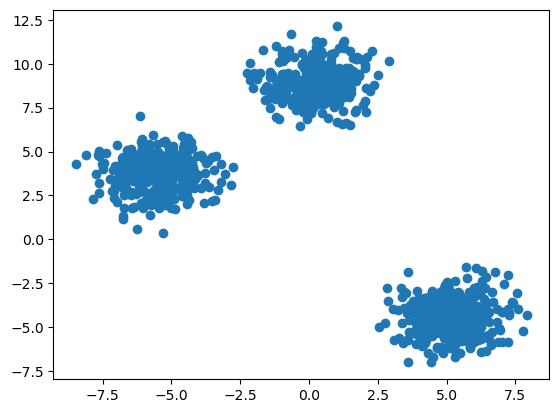

In [7]:
plt.scatter(X[:,0],X[:,1])

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test =train_test_split(X,y,test_size=0.33, random_state=42)

In [13]:
from sklearn.cluster import KMeans

In [17]:
## Manual Process
# Elbow Method to select the K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [19]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 992.1300308656066,
 853.5186163615213,
 754.5344380919564,
 667.9238301677774,
 578.1616226663845,
 534.5357641966156]

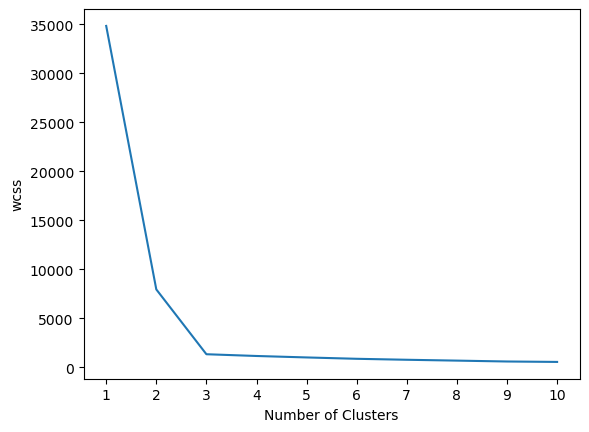

In [21]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [25]:
y_label=kmeans.fit_predict(X_train)

C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [27]:
y_label

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1,

In [35]:
y_label=kmeans.predict(X_test)

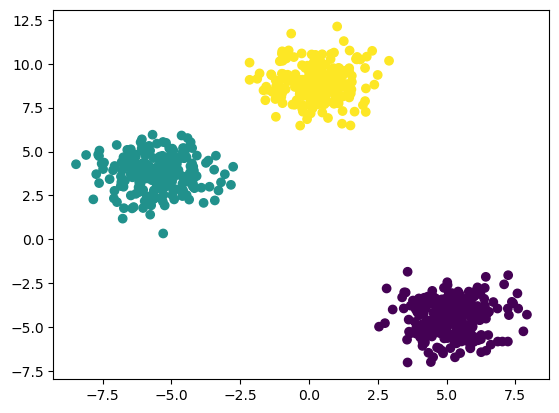

In [29]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

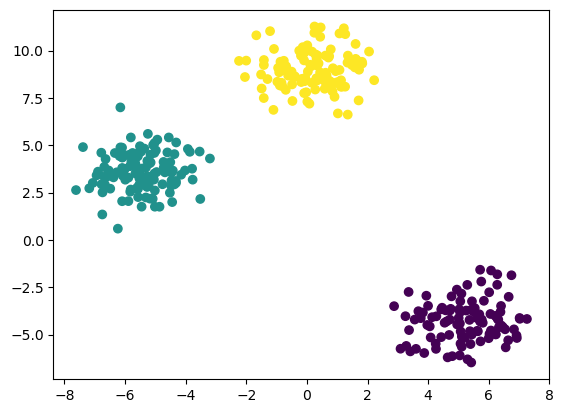

In [37]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_label)

In [39]:
## Knee locator
!pip install kneed

In [41]:
from kneed import KneeLocator

In [45]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [49]:
## performance metrics
## silhoutte score
from sklearn.metrics import silhouette_score

In [53]:
silhouette_cofficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_cofficients.append(score)

C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vandana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [55]:
silhouette_cofficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.3301039376666072,
 0.3497193753105919,
 0.3356093934889842,
 0.34532164692344375,
 0.34315502882487]

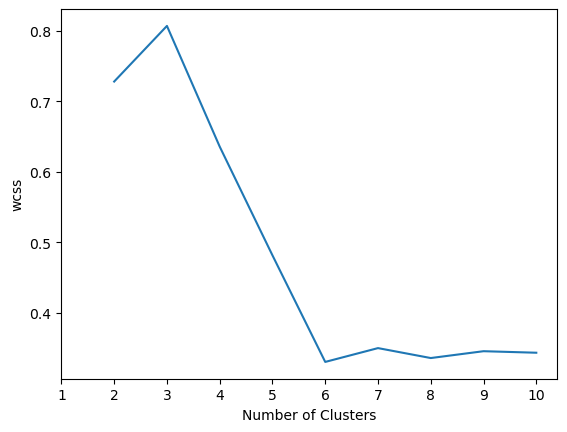

In [57]:
plt.plot(range(2,11),silhouette_cofficients)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()